# Importando pacotes:

In [ ]:
import io
from itertools import count
import pydotplus
import pandas as pd
import numpy as np
import pylab as pl
import operator
import codecs
import random
import math
from itertools import chain

import networkx as nx
from networkx import Graph as NXGraph
from networkx.drawing.nx_agraph import graphviz_layout
from collections import Counter, OrderedDict

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import collections

import urllib
from bs4 import BeautifulSoup

from IPython.display import display, Image

# Carregando as bases de dados: champion_stats.csv e matches2020.csv

In [248]:
df = pd.read_csv('C:\\Users\\eduar\\Desktop\\trabalhobd\\champion_stats.csv')
df.loc[0,'Superclass(es)'] = 'owl:Thing'
df.head(10)


,Unnamed: 0,id,key,attack,defense,magic,difficulty,tags,hp,hpperlevel,...,hpregenperlevel,mpregen,mpregenperlevel,crit,critperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,Superclass(es)
0,0,Aatrox,266,8,4,3,4,"['Fighter', 'Tank']",580.00,90,...,1.00,0.000,0.000,0,0,60.000,5.000,2.500,0.651,owl:Thing
1,1,Ahri,103,3,4,8,5,"['Mage', 'Assassin']",526.00,92,...,0.60,8.000,0.800,0,0,53.040,3.000,2.000,0.668,NaN
2,2,Akali,84,5,3,8,7,['Assassin'],575.00,95,...,0.50,50.000,0.000,0,0,62.400,3.300,3.200,0.625,NaN
3,3,Alistar,12,6,9,5,7,"['Tank', 'Support']",600.00,106,...,0.85,8.500,0.800,0,0,62.000,3.750,2.125,0.625,NaN
4,4,Amumu,32,2,6,8,3,"['Tank', 'Mage']",613.12,84,...,0.85,7.382,0.525,0,0,53.380,3.800,2.180,0.736,NaN
5,5,Anivia,34,1,4,10,10,"['Mage', 'Support']",480.00,82,...,0.55,8.000,0.800,0,0,51.376,3.200,1.680,0.625,NaN
6,6,Annie,1,2,3,10,6,['Mage'],524.00,88,...,0.55,8.000,0.800,0,0,50.410,2.625,1.360,0.579,NaN
7,7,Aphelios,523,6,2,1,10,['Marksman'],530.00,88,...,0.55,6.500,0.400,0,0,57.000,2.000,2.100,0.640,NaN
8,8,Ashe,22,7,3,2,4,"['Marksman', 'Support']",570.00,87,...,0.55,6.972,0.400,0,0,61.000,2.960,3.330,0.658,NaN
9,9,AurelionSol,136,2,3,8,7,['Mage'],575.00,92,...,0.60,6.000,0.800,0,0,57.000,3.200,1.360,0.625,NaN


In [229]:
df2 = pd.read_csv('C:\\Users\\eduar\\Desktop\\trabalhobd\\matches2020.csv')
df2.loc[0,'Superclass(es)'] = 'owl:Thing'
df2.head(10)

,Unnamed: 0,gameid,league,blueteam,redteam,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result,Superclass(es)
0,0,ESPORTSTMNT03/1241318,KeSPA,SANDBOX Gaming,T1,Rumble,Elise,Qiyana,MissFortune,Nautilus,Aatrox,Gragas,Mordekaiser,Xayah,Rakan,1,owl:Thing
1,1,ESPORTSTMNT03/1241322,KeSPA,T1,SANDBOX Gaming,Jayce,JarvanIV,Orianna,MissFortune,Nautilus,Aatrox,Elise,Qiyana,Varus,TahmKench,0,NaN
2,2,ESPORTSTMNT03/1241324,KeSPA,T1,SANDBOX Gaming,Renekton,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1,NaN
3,3,ESPORTSTMNT03/1241328,KeSPA,T1,SANDBOX Gaming,Pantheon,Elise,Nautilus,Xayah,Rakan,Quinn,Olaf,Orianna,MissFortune,Leona,0,NaN
4,4,ESPORTSTMNT03/1241386,KeSPA,DRX,Afreeca Freecs,Mordekaiser,JarvanIV,Ryze,Xayah,Rakan,Renekton,Elise,Velkoz,Varus,Braum,0,NaN
5,5,ESPORTSTMNT03/1241394,KeSPA,Afreeca Freecs,DRX,Kennen,Olaf,Ornn,MissFortune,Braum,Vladimir,LeeSin,Rumble,Varus,Thresh,1,NaN
6,6,ESPORTSTMNT03/1241396,KeSPA,Afreeca Freecs,DRX,Camille,Qiyana,Orianna,MissFortune,Braum,Aatrox,LeeSin,Fizz,Varus,Thresh,1,NaN
7,7,ESPORTSTMNT03/1241467,KeSPA,SANDBOX Gaming,Afreeca Freecs,Rumble,Olaf,Syndra,Senna,TahmKench,Irelia,LeeSin,Ekko,Varus,Braum,0,NaN
8,8,ESPORTSTMNT03/1241468,KeSPA,Afreeca Freecs,SANDBOX Gaming,Kennen,Qiyana,Ornn,Xayah,Rakan,Aatrox,LeeSin,Vladimir,Varus,TahmKench,1,NaN
9,9,ESPORTSTMNT03/1241474,KeSPA,SANDBOX Gaming,Afreeca Freecs,Aatrox,Olaf,Orianna,Varus,TahmKench,Hecarim,Qiyana,Rumble,Sivir,Nautilus,0,NaN


# Verificando consistência dos dados nas tabelas:

In [213]:
##number of champions
df['id'].unique()

array(['Aatrox', 'Ahri', 'Akali', 'Alistar', 'Amumu', 'Anivia', 'Annie',
       'Aphelios', 'Ashe', 'AurelionSol', 'Azir', 'Bard', 'Blitzcrank',
       'Brand', 'Braum', 'Caitlyn', 'Camille', 'Cassiopeia', 'Chogath',
       'Corki', 'Darius', 'Diana', 'Draven', 'DrMundo', 'Ekko', 'Elise',
       'Evelynn', 'Ezreal', 'Fiddlesticks', 'Fiora', 'Fizz', 'Galio',
       'Gangplank', 'Garen', 'Gnar', 'Gragas', 'Graves', 'Hecarim',
       'Heimerdinger', 'Illaoi', 'Irelia', 'Ivern', 'Janna', 'JarvanIV',
       'Jax', 'Jayce', 'Jhin', 'Jinx', 'Kaisa', 'Kalista', 'Karma',
       'Karthus', 'Kassadin', 'Katarina', 'Kayle', 'Kayn', 'Kennen',
       'Khazix', 'Kindred', 'Kled', 'KogMaw', 'Leblanc', 'LeeSin',
       'Leona', 'Lillia', 'Lissandra', 'Lucian', 'Lulu', 'Lux',
       'Malphite', 'Malzahar', 'Maokai', 'MasterYi', 'MissFortune',
       'MonkeyKing', 'Mordekaiser', 'Morgana', 'Nami', 'Nasus',
       'Nautilus', 'Neeko', 'Nidalee', 'Nocturne', 'Nunu', 'Olaf',
       'Orianna', 'Ornn', 'Panth

In [247]:
len(df2['blueteam'].unique())

245

# Removendo dados desnecessários:

In [249]:
df.drop(['key'], axis=1)

,Unnamed: 0,id,attack,defense,magic,difficulty,tags,hp,hpperlevel,mp,...,hpregenperlevel,mpregen,mpregenperlevel,crit,critperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,Superclass(es)
0,0,Aatrox,8,4,3,4,"['Fighter', 'Tank']",580.00,90,0.0,...,1.00,0.000,0.000,0,0,60.000,5.00,2.500,0.651,owl:Thing
1,1,Ahri,3,4,8,5,"['Mage', 'Assassin']",526.00,92,418.0,...,0.60,8.000,0.800,0,0,53.040,3.00,2.000,0.668,NaN
2,2,Akali,5,3,8,7,['Assassin'],575.00,95,200.0,...,0.50,50.000,0.000,0,0,62.400,3.30,3.200,0.625,NaN
3,3,Alistar,6,9,5,7,"['Tank', 'Support']",600.00,106,350.0,...,0.85,8.500,0.800,0,0,62.000,3.75,2.125,0.625,NaN
4,4,Amumu,2,6,8,3,"['Tank', 'Mage']",613.12,84,287.2,...,0.85,7.382,0.525,0,0,53.380,3.80,2.180,0.736,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,Zed,9,2,1,7,['Assassin'],584.00,85,200.0,...,0.65,50.000,0.000,0,0,63.000,3.40,3.300,0.651,NaN
146,146,Ziggs,2,4,9,4,['Mage'],536.00,92,480.0,...,0.60,8.000,0.800,0,0,54.208,3.10,2.000,0.656,NaN
147,147,Zilean,2,5,8,6,"['Support', 'Mage']",504.00,82,452.0,...,0.50,11.335,0.800,0,0,51.640,3.00,2.130,0.625,NaN
148,148,Zoe,1,7,8,5,"['Mage', 'Support']",560.00,92,425.0,...,0.60,8.000,0.650,0,0,58.000,3.30,2.500,0.625,NaN


In [250]:
df2.drop(['gameid'],axis=1)

,Unnamed: 0,league,blueteam,redteam,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result,Superclass(es)
0,0,KeSPA,SANDBOX Gaming,T1,Rumble,Elise,Qiyana,MissFortune,Nautilus,Aatrox,Gragas,Mordekaiser,Xayah,Rakan,1,owl:Thing
1,1,KeSPA,T1,SANDBOX Gaming,Jayce,JarvanIV,Orianna,MissFortune,Nautilus,Aatrox,Elise,Qiyana,Varus,TahmKench,0,NaN
2,2,KeSPA,T1,SANDBOX Gaming,Renekton,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1,NaN
3,3,KeSPA,T1,SANDBOX Gaming,Pantheon,Elise,Nautilus,Xayah,Rakan,Quinn,Olaf,Orianna,MissFortune,Leona,0,NaN
4,4,KeSPA,DRX,Afreeca Freecs,Mordekaiser,JarvanIV,Ryze,Xayah,Rakan,Renekton,Elise,Velkoz,Varus,Braum,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607,5607,LCS,FlyQuest,Team SoloMid,Ornn,Graves,Viktor,Caitlyn,Lux,Camille,Sett,Zilean,Ashe,Karma,0,NaN
5608,5608,LCS,FlyQuest,Team SoloMid,Ornn,Graves,Azir,Caitlyn,Pantheon,Jax,Sett,TwistedFate,Ashe,Bard,0,NaN
5609,5609,LCS,Team SoloMid,FlyQuest,Jayce,Sett,TwistedFate,Ashe,Bard,Gangplank,Hecarim,Orianna,Senna,Nautilus,0,NaN
5610,5610,LCS,FlyQuest,Team SoloMid,Ornn,Volibear,Azir,Caitlyn,Pantheon,Jayce,Sett,Syndra,Ashe,Morgana,1,NaN


# Organizando configurações para o grafo:

In [150]:
chosen = ['aliceblue', 
          'antiquewhite',
          'aquamarine', 
          'azure', 
          'beige', 
          'bisque', 
          'pink', 
          'blanchedalmond', 
          'lightskyblue', 
          'lightcoral', 
          'brown', 
          'burlywood', 
          'cadetblue', 
          'coral', 
          'cornflowerblue',
          'cornsilk', 
          'crimson', 
          'cyan', 
          'darkblue', 
          'darkcyan', 
          'darkgoldenrod', 
          'darkgray', 
          'darkgreen', 
          'darkgrey', 
          'darkkhaki', 
          'darkmagenta', 
          'darkolivegreen']
colors = dict(zip(df['tags'].unique(),chosen))
df_colors = pd.DataFrame({'tags':df['tags'].unique(), 'colors':chosen})
df_colors.head(27)

,tags,colors
0,"['Fighter', 'Tank']",aliceblue
1,"['Mage', 'Assassin']",antiquewhite
2,['Assassin'],aquamarine
3,"['Tank', 'Support']",azure
4,"['Tank', 'Mage']",beige
5,"['Mage', 'Support']",bisque
6,['Mage'],pink
7,['Marksman'],blanchedalmond
8,"['Marksman', 'Support']",lightskyblue
9,"['Mage', 'Marksman']",lightcoral


In [153]:
x = zip(df['id'].values, df['tags'].values) 
classes = dict(x)
classes

{'Aatrox': "['Fighter', 'Tank']",
 'Ahri': "['Mage', 'Assassin']",
 'Akali': "['Assassin']",
 'Alistar': "['Tank', 'Support']",
 'Amumu': "['Tank', 'Mage']",
 'Anivia': "['Mage', 'Support']",
 'Annie': "['Mage']",
 'Aphelios': "['Marksman']",
 'Ashe': "['Marksman', 'Support']",
 'AurelionSol': "['Mage']",
 'Azir': "['Mage', 'Marksman']",
 'Bard': "['Support', 'Mage']",
 'Blitzcrank': "['Tank', 'Fighter']",
 'Brand': "['Mage']",
 'Braum': "['Support', 'Tank']",
 'Caitlyn': "['Marksman']",
 'Camille': "['Fighter', 'Tank']",
 'Cassiopeia': "['Mage']",
 'Chogath': "['Tank', 'Mage']",
 'Corki': "['Marksman']",
 'Darius': "['Fighter', 'Tank']",
 'Diana': "['Fighter', 'Mage']",
 'Draven': "['Marksman']",
 'DrMundo': "['Fighter', 'Tank']",
 'Ekko': "['Assassin', 'Fighter']",
 'Elise': "['Mage', 'Fighter']",
 'Evelynn': "['Assassin', 'Mage']",
 'Ezreal': "['Marksman', 'Mage']",
 'Fiddlesticks': "['Mage', 'Support']",
 'Fiora': "['Fighter', 'Assassin']",
 'Fizz': "['Assassin', 'Fighter']",
 'Gal

# Criando função responsável por atribuir nós ao grafo e identificá-los por suas respectivas cores pré-definidas:

In [179]:
#create graph
G = nx.DiGraph()
#add nodes
def addnode(dict,dict2):
    for i in dict.keys():
        if i in dict.keys():
            G.add_node(i, color=dict.get(i))
        for y,c in dict2.items():
            if c == i:
                G.add_node(y, color=dict.get(i))
                G.add_edge(y,c, color = 'black', relation='is a')
addnode(colors,classes)

In [177]:
G.nodes()

NodeView(("['Fighter', 'Tank']", 'Aatrox', 'Camille', 'Darius', 'DrMundo', 'Garen', 'Gnar', 'Hecarim', 'Illaoi', 'Kled', 'MonkeyKing', 'Nasus', 'Olaf', 'Renekton', 'Sett', 'Shyvana', 'Skarner', 'Trundle', 'Udyr', 'Urgot', 'Volibear', 'Warwick', 'Yorick', "['Mage', 'Assassin']", 'Ahri', 'Malzahar', 'Sylas', "['Assassin']", 'Akali', 'Khazix', 'Shaco', 'Talon', 'Zed', "['Tank', 'Support']", 'Alistar', 'Leona', "['Tank', 'Mage']", 'Amumu', 'Chogath', 'Galio', 'Maokai', "['Mage', 'Support']", 'Anivia', 'Fiddlesticks', 'Heimerdinger', 'Karma', 'Lux', 'Morgana', 'Neeko', 'Orianna', 'Syndra', 'Taliyah', 'Zoe', 'Zyra', "['Mage']", 'Annie', 'AurelionSol', 'Brand', 'Cassiopeia', 'Karthus', 'Lissandra', 'TwistedFate', 'Veigar', 'Velkoz', 'Viktor', 'Vladimir', 'Xerath', 'Ziggs', "['Marksman']", 'Aphelios', 'Caitlyn', 'Corki', 'Draven', 'Graves', 'Jinx', 'Kaisa', 'Kalista', 'Kindred', 'Lucian', 'MissFortune', 'Sivir', 'Xayah', "['Marksman', 'Support']", 'Ashe', 'Senna', "['Mage', 'Marksman']", 'Azir

# Criando o grafo:

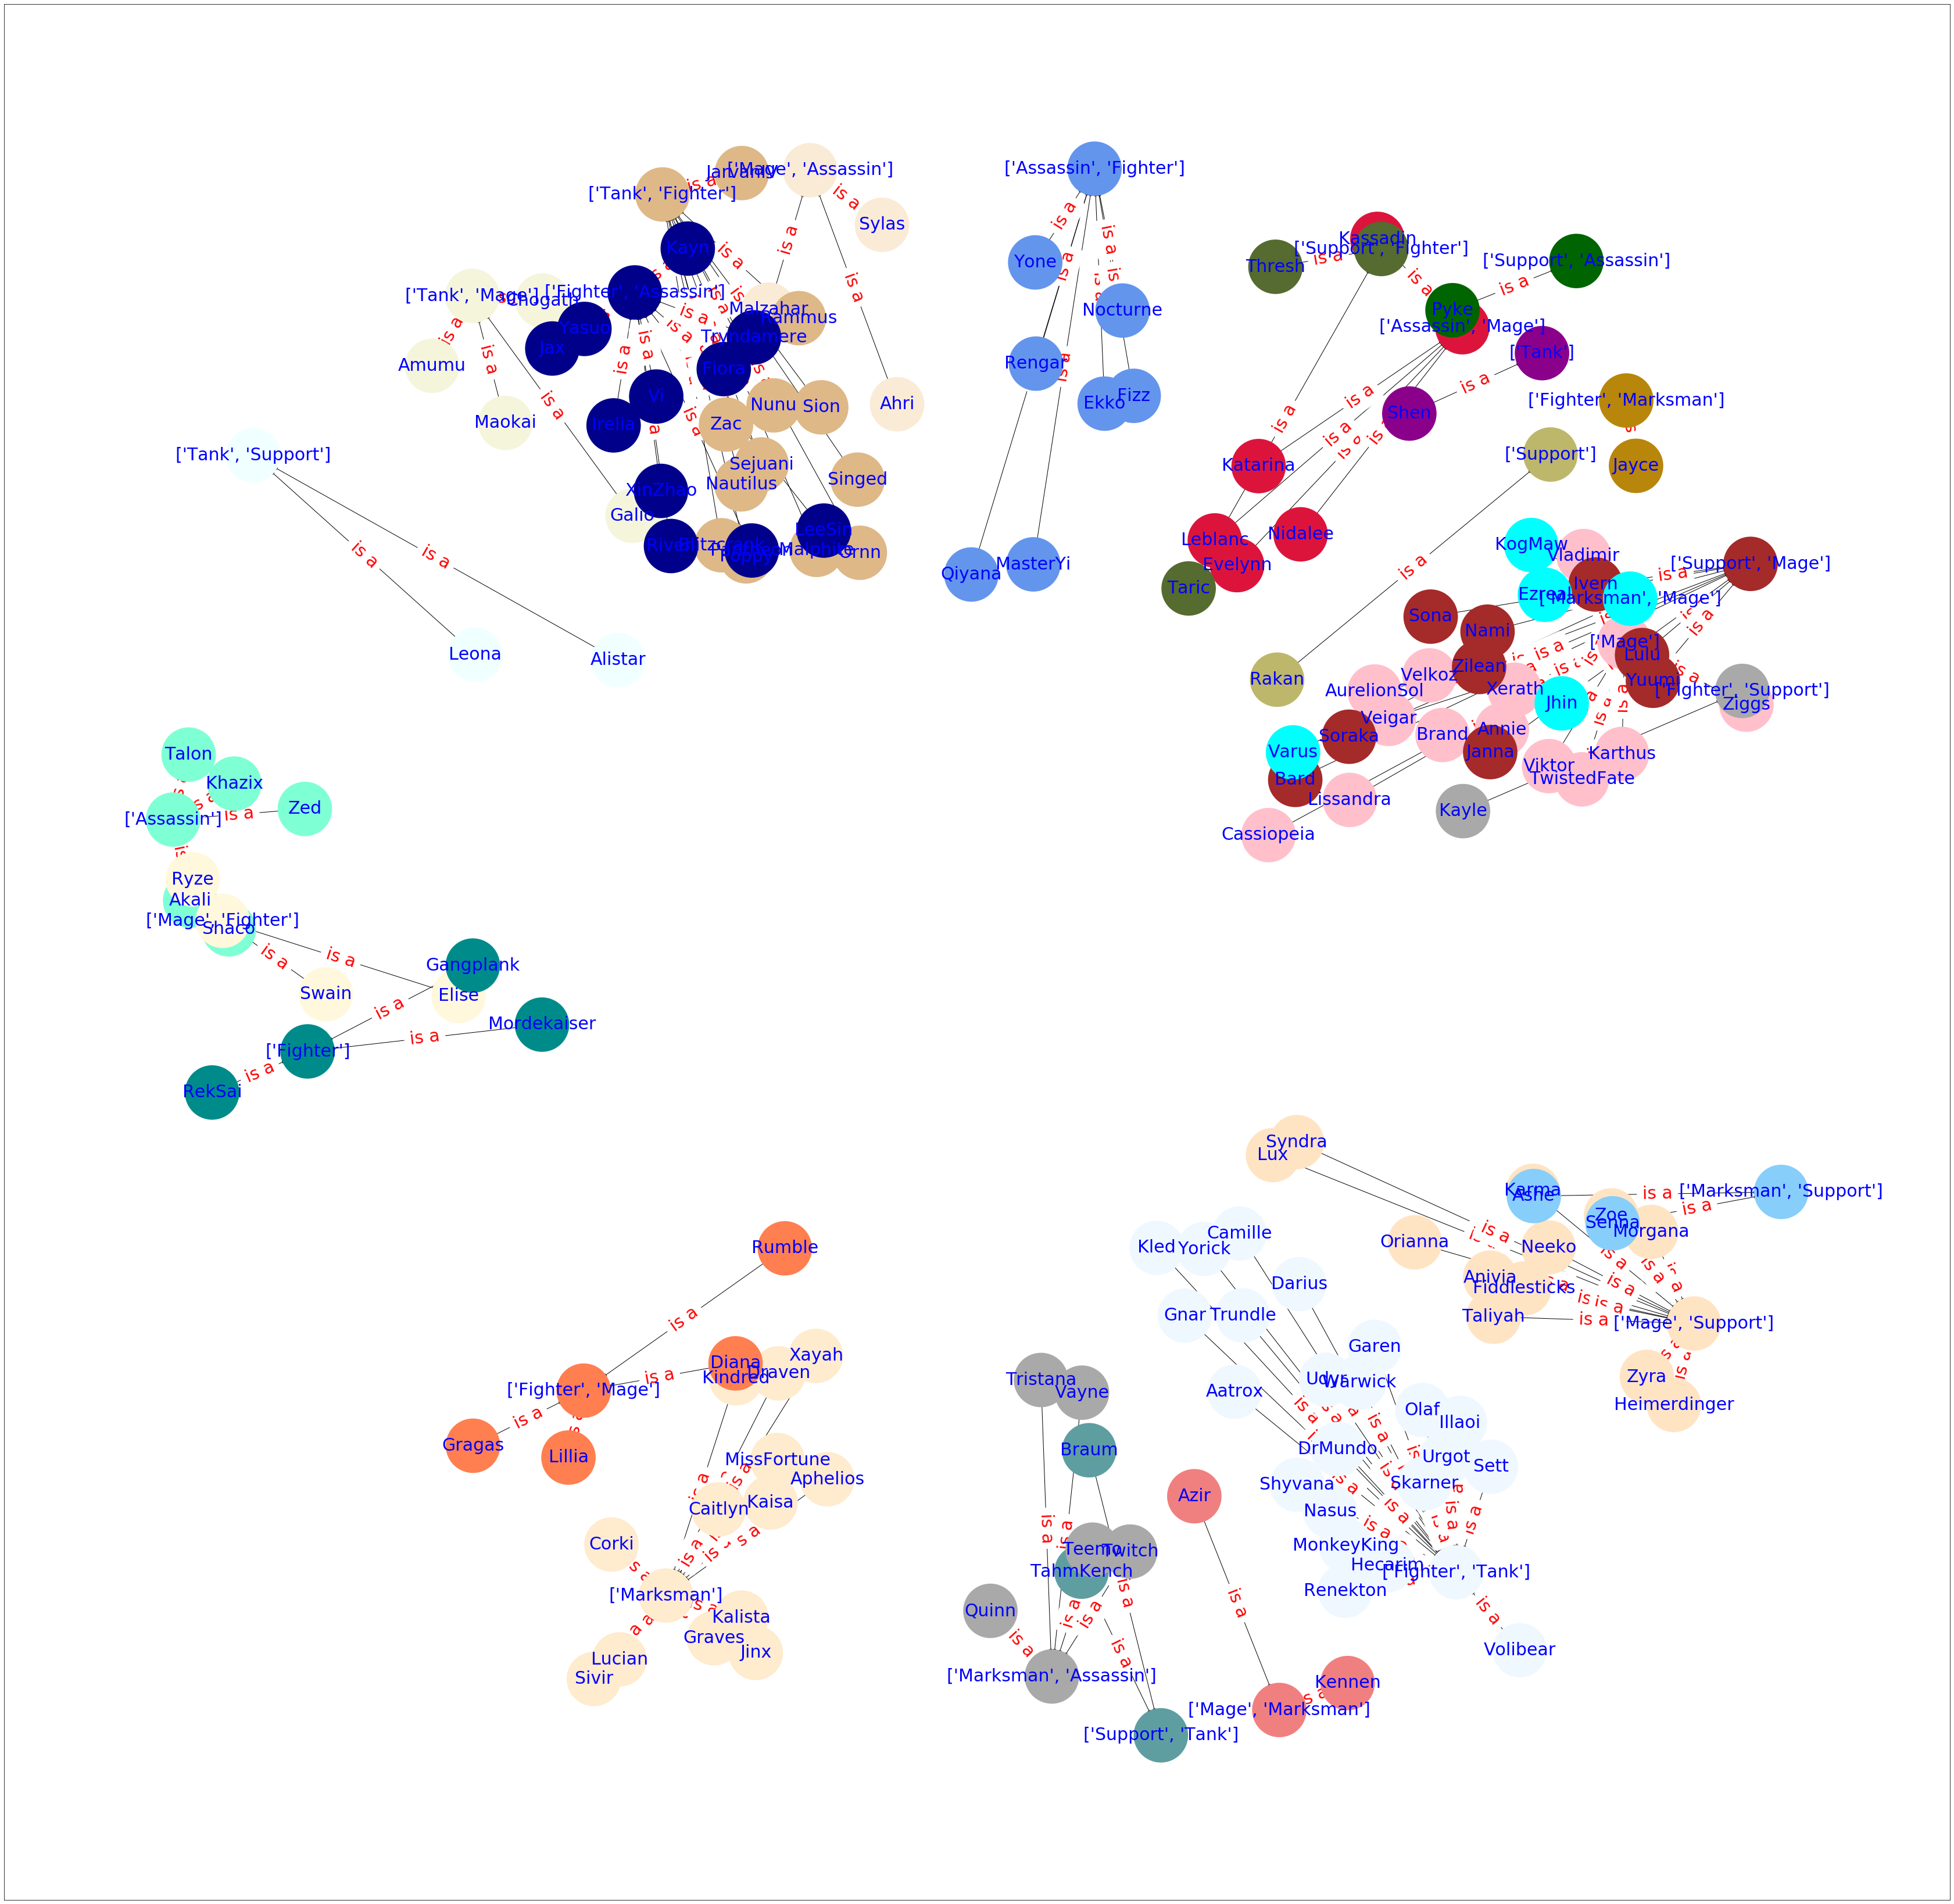

In [201]:
fig, ax = plt.subplots(figsize=(60,60))

pos = nx.spring_layout(G, scale=1, k=0.1, iterations=25)

nx.draw_networkx_edge_labels(G, 
                             pos, 
                             edge_labels=nx.get_edge_attributes(G,'relation'),
                             label_pos=0.5, 
                             font_size=30, 
                             font_color='red', 
                             font_family='sans-serif', 
                             font_weight='normal', 
                             alpha=1.0, 
                             bbox=None, 
                             ax=ax, 
                             rotate=True,)

nx.draw_networkx(G, 
                 pos=pos, 
                 arrows=True,
                 with_labels=True,
                 ax=ax,
                 nodelist=G.nodes(),
                 edgelist=G.edges(),
                 node_size=7000,
                 node_color=[nx.get_node_attributes(G,'color')[g] for g in G.nodes()],
                 node_shape='o',
                 alpha=1.0,
                 cmap=None,
                 vmin=None,
                 vmax=None,
                 linewidths=10.0,
                 width=1.0,
                 edge_color=[nx.get_edge_attributes(G,'color')[g] for g in G.edges()],
                 edge_cmap=None,
                 edge_vmin=None,
                 edge_vmax=None,
                 style='solid',
                 labels=None ,
                 font_size=30,
                 font_color='blue',
                 font_weight='normal',
                 font_family='sans-serif',
                 label='champion_stats',)

plt.show()

# Respondendo questões relevantes sobre os data sets:

Quais tags possuem mais personagens?

In [221]:
common_tags = Counter(list(df['tags'])).most_common(27)
df_tags = pd.DataFrame(common_tags, columns = ['tags', '# of champions'] )
df_tags

,tags,# of champions
0,"['Fighter', 'Tank']",22
1,['Mage'],13
2,['Marksman'],13
3,"['Mage', 'Support']",12
4,"['Tank', 'Fighter']",12
5,"['Fighter', 'Assassin']",11
6,"['Support', 'Mage']",9
7,"['Assassin', 'Fighter']",7
8,['Assassin'],5
9,"['Assassin', 'Mage']",5


Text(0.5, 1.0, 'tags')

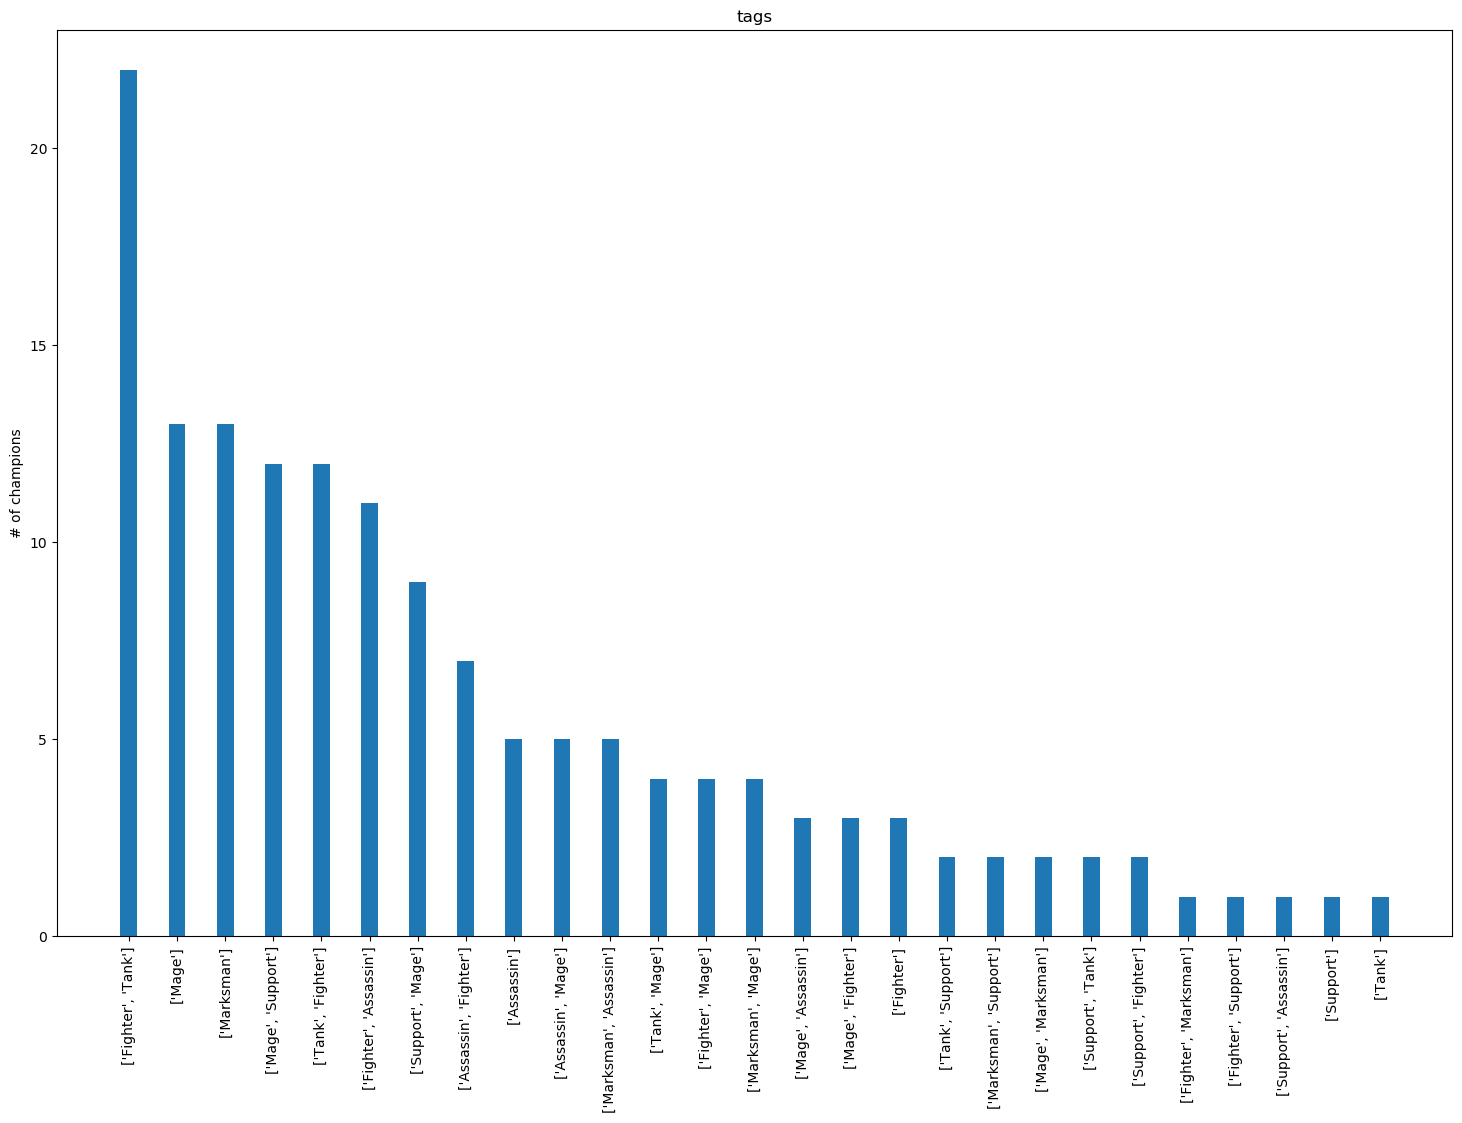

In [228]:
x = np.arange(len(Counter(list(df['tags'])).most_common(27)))
y = list(zip(*Counter(list(df['tags'])).most_common(27)))[1]
labels = list(zip(*Counter(list(df['tags'])).most_common(27)))[0]
y2max = max(y) + 1

plt.figure(figsize=(18,12), dpi=100)
plt.bar(x, y, width=0.35)
plt.xticks(x, labels)
plt.ylim(0, y2max)
plt.xticks(rotation=90)
plt.ylabel('# of champions')
plt.title('tags')

Quais são os personagens mais escolhidos?

Junglers:

In [241]:
junglers = list(df2['bluejungle']) + list(df2['redjungle'])
most_selected_junglers = Counter(junglers).most_common(10)
df_jg = pd.DataFrame(most_selected_junglers, columns = ['id', '# of selections'] )
df_jg

,id,# of selections
0,LeeSin,1568
1,Trundle,1393
2,Graves,1094
3,JarvanIV,899
4,Olaf,766
5,Nidalee,661
6,RekSai,626
7,Volibear,589
8,Gragas,522
9,Elise,502


Mid Lanners:

In [242]:
mid = list(df2['bluemid']) + list(df2['redmid'])
most_selected_mid = Counter(mid).most_common(10)
df_mid = pd.DataFrame(most_selected_mid, columns = ['id', '# of selections'] )
df_mid

,id,# of selections
0,Zoe,1186
1,Syndra,1052
2,Azir,1033
3,Leblanc,811
4,Orianna,797
5,Galio,550
6,TwistedFate,447
7,Corki,392
8,Sylas,367
9,Rumble,309


Top Lanners:

In [243]:
top = list(df2['bluetop']) + list(df2['redtop'])
most_selected_top = Counter(top).most_common(10)
df_top = pd.DataFrame(most_selected_top, columns = ['id', '# of selections'] )
df_top

,id,# of selections
0,Ornn,1572
1,Renekton,1448
2,Aatrox,1182
3,Mordekaiser,768
4,Sett,754
5,MonkeyKing,648
6,Gangplank,548
7,Camille,525
8,Jayce,405
9,Kennen,348


Ad Carries:

In [244]:
#Ad Carry
adc = list(df2['blueadc']) + list(df2['redadc'])
most_selected_adc = Counter(adc).most_common(10)
df_adc = pd.DataFrame(most_selected_adc, columns = ['id', '# of selections'] )
df_adc

,id,# of selections
0,Aphelios,2145
1,Ezreal,1657
2,Ashe,1325
3,MissFortune,1240
4,Varus,971
5,Kalista,898
6,Senna,808
7,Kaisa,405
8,Caitlyn,370
9,Jhin,328


Supports:

In [245]:
#Support
support = list(df2['bluesupport']) + list(df2['redsupport'])
most_selected_support = Counter(support).most_common(10)
df_sup = pd.DataFrame(most_selected_support, columns = ['id', '# of selections'] )
df_sup

,id,# of selections
0,Nautilus,2037
1,Thresh,1729
2,Braum,1086
3,Leona,873
4,TahmKench,863
5,Bard,731
6,Yuumi,477
7,Rakan,453
8,Sett,444
9,Karma,437


Exemplo de demonstração gráfica dos personagens mais selecionados: junglers

Text(0.5, 1.0, 'junglers')

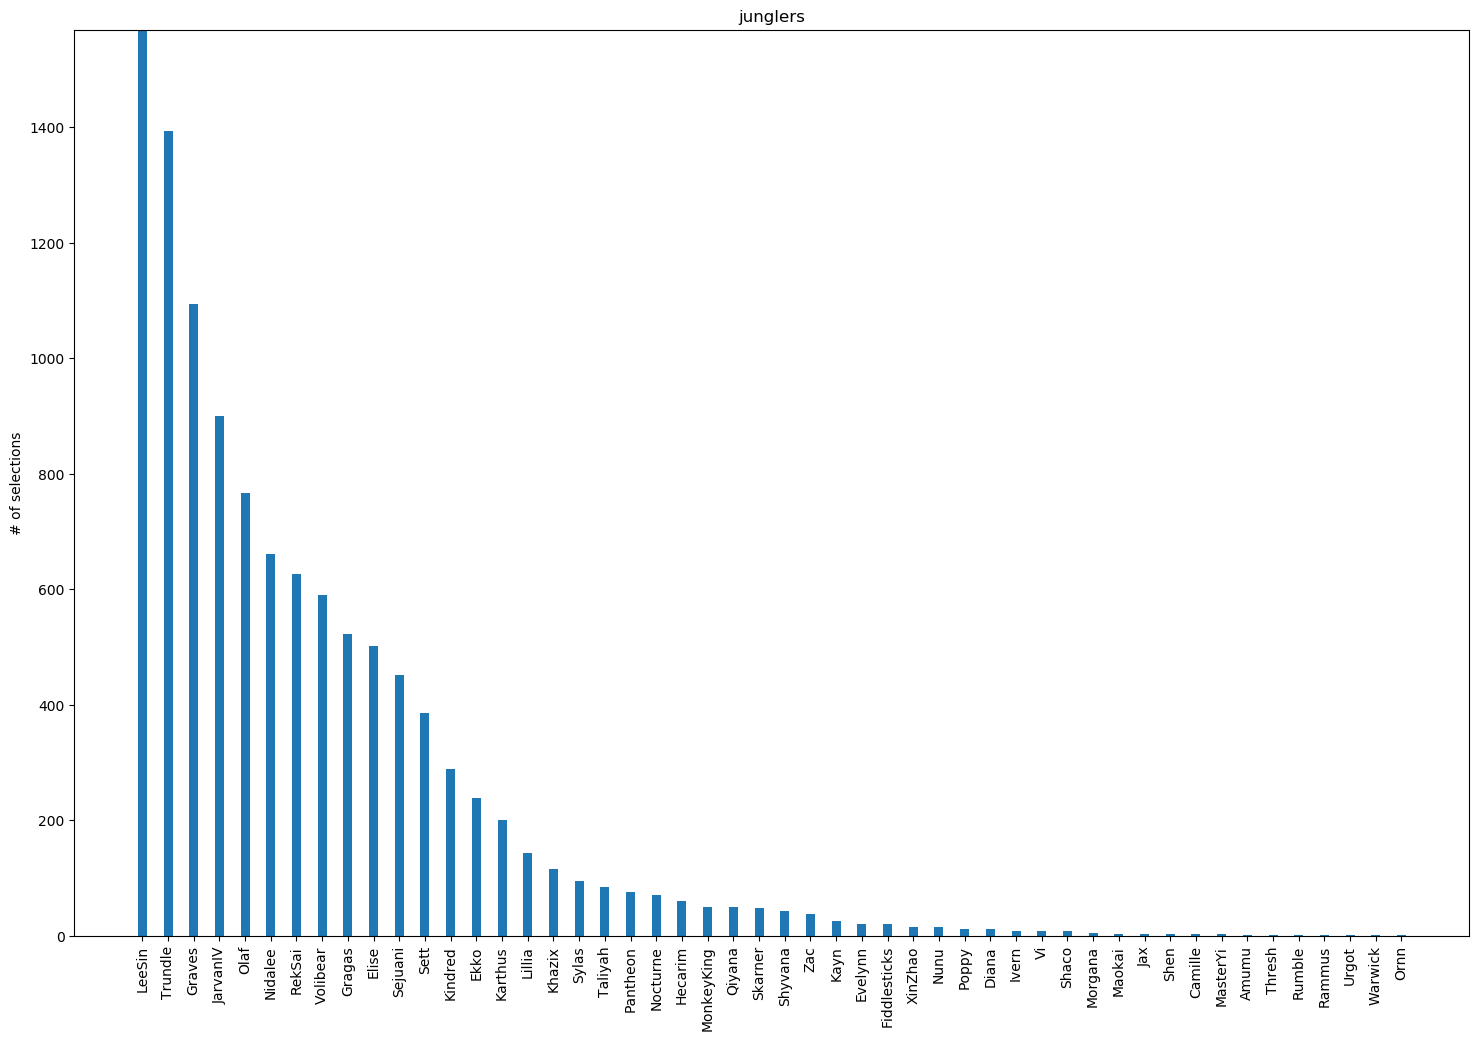

In [252]:
x = np.arange(len(Counter(junglers).most_common(50)))
y = list(zip(*Counter(junglers).most_common(50)))[1]
labels = list(zip(*Counter(junglers).most_common(50)))[0]
y2max = max(y) + 1

plt.figure(figsize=(18,12), dpi=100)
plt.bar(x, y, width=0.35)
plt.xticks(x, labels)
plt.ylim(0, y2max)
plt.xticks(rotation=90)
plt.ylabel('# of selections')
plt.title('junglers')

Quais times tiveram mais jogos?

In [235]:
teams = list(df2['blueteam']) + list(df2['redteam'])
team_games = Counter(teams).most_common(50)
df_team = pd.DataFrame(team_games, columns = ['Team Name', '# of games'] )
df_team

,Team Name,# of games
0,DRX,114
1,FunPlus Phoenix,111
2,Top Esports,105
3,T1,103
4,Team Flash,103
5,Gen.G,103
6,Invictus Gaming,102
7,SANDBOX Gaming,100
8,JD Gaming,100
9,GAM Esports,100


Representação gráfica dos times que tiveram mais jogos:

Text(0.5, 1.0, 'Team Names')

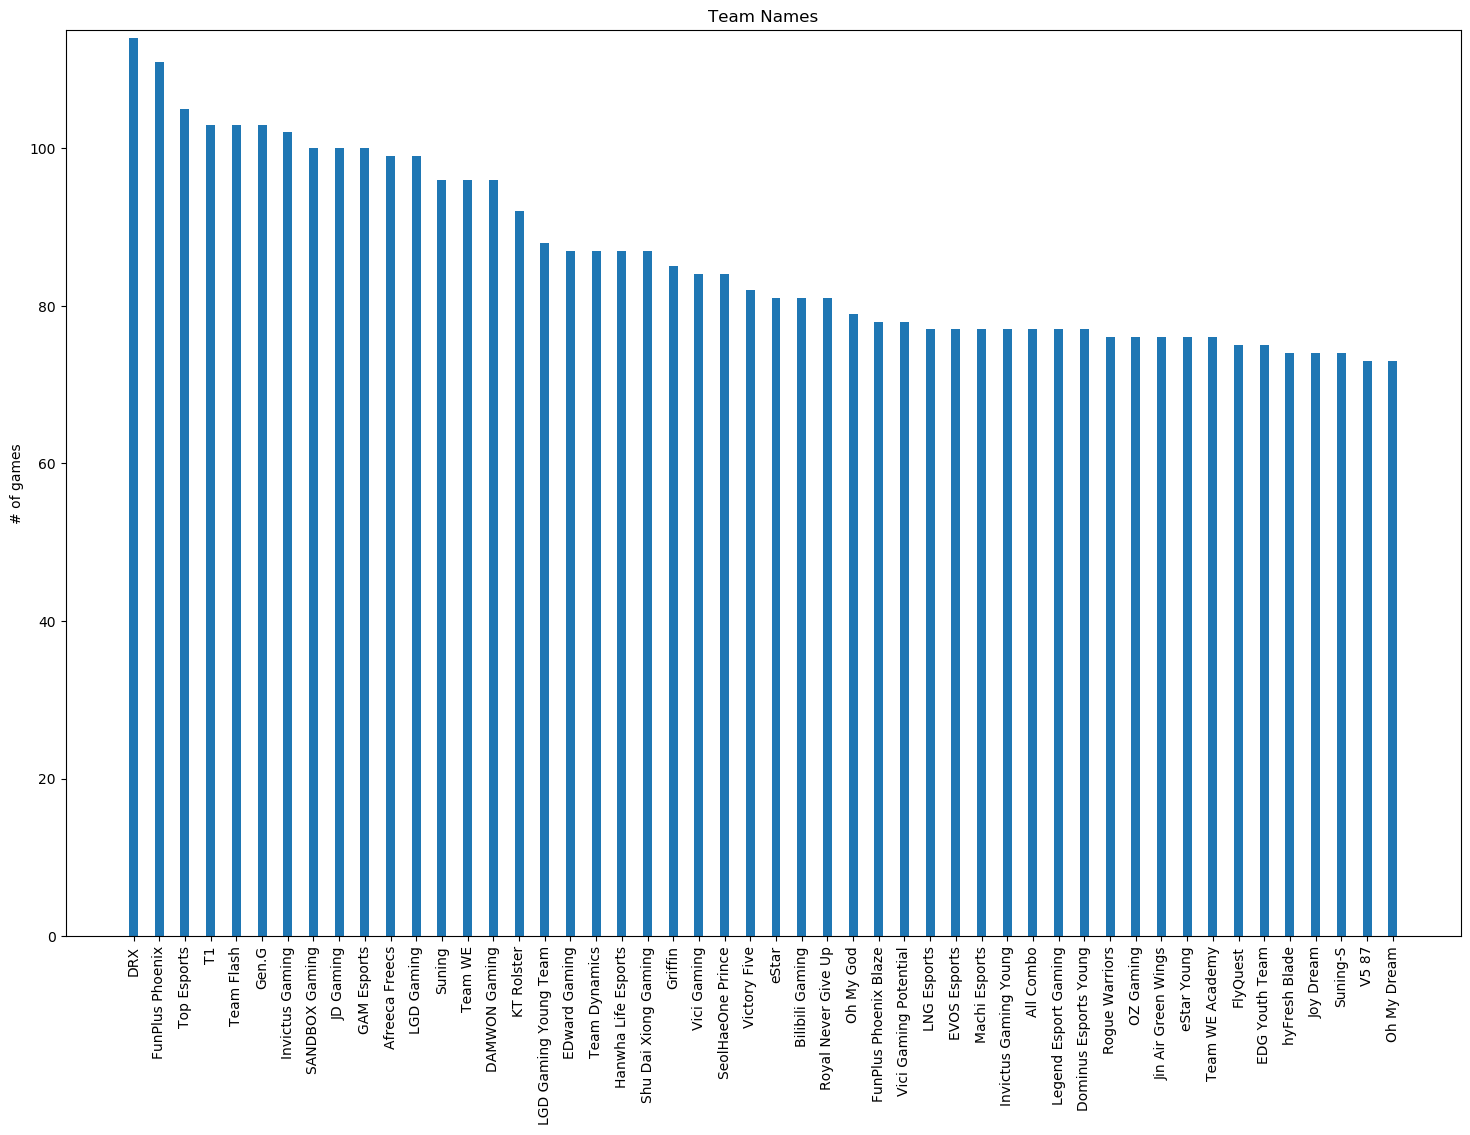

In [236]:
x = np.arange(len(Counter(teams).most_common(50)))
y = list(zip(*Counter(teams).most_common(50)))[1]
labels = list(zip(*Counter(teams).most_common(50)))[0]
y2max = max(y) + 1

plt.figure(figsize=(18,12), dpi=100)
plt.bar(x, y, width=0.35)
plt.xticks(x, labels)
plt.ylim(0, y2max)
plt.xticks(rotation=90)
plt.ylabel('# of games')
plt.title('Team Names')